In [325]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [326]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [327]:
# Droping the columns
df = df.drop(['PassengerId','Name','Ticket'],axis = 1)

In [328]:
# Checking null values
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [329]:
# Filling the null values

In [330]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])

In [331]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    2
dtype: int64

In [332]:
# Embarked has only 2 null values so droping the rows
df.dropna(inplace=True)

In [333]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Cabin     889 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


In [335]:
# Converting Float Values to int

In [336]:
df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(int)

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  889 non-null    int64 
 1   Pclass    889 non-null    int64 
 2   Sex       889 non-null    object
 3   Age       889 non-null    int64 
 4   SibSp     889 non-null    int64 
 5   Parch     889 non-null    int64 
 6   Fare      889 non-null    int64 
 7   Cabin     889 non-null    object
 8   Embarked  889 non-null    object
dtypes: int64(6), object(3)
memory usage: 69.5+ KB


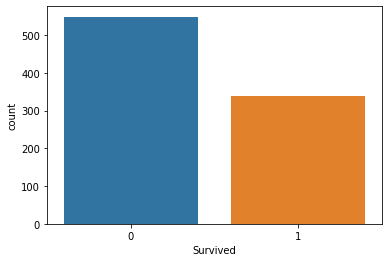

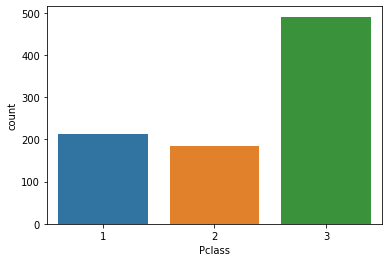

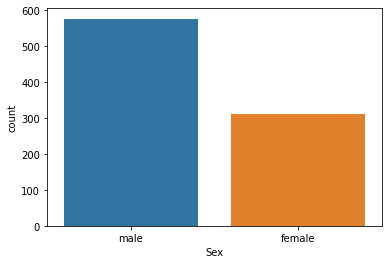

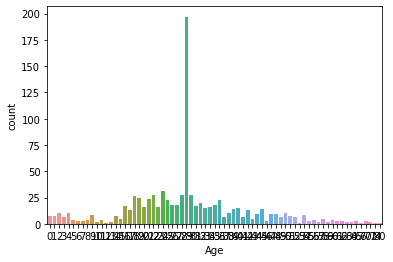

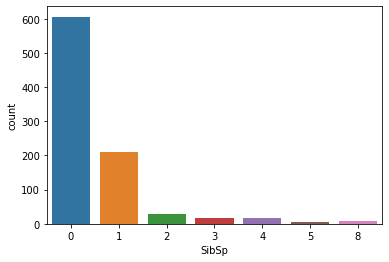

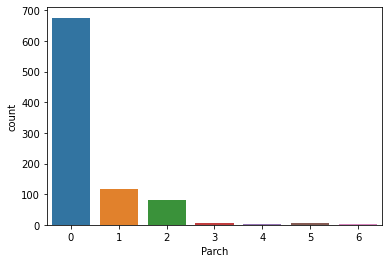

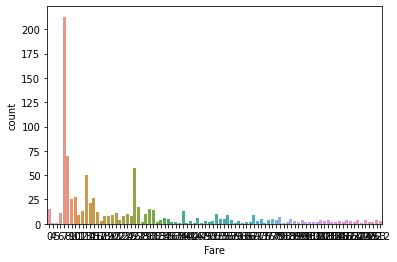

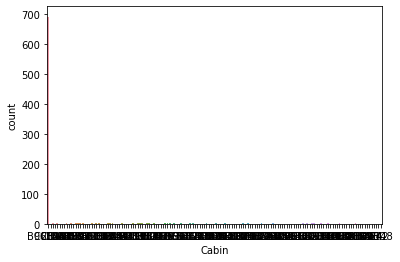

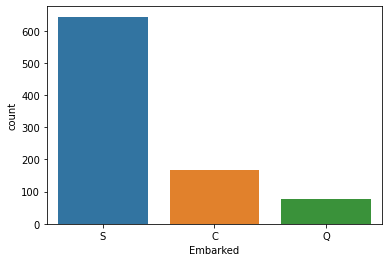

In [338]:
for i in df.columns:
  plt.show()
  sns.countplot(df[i])

In [339]:
# We have Imbalance Data

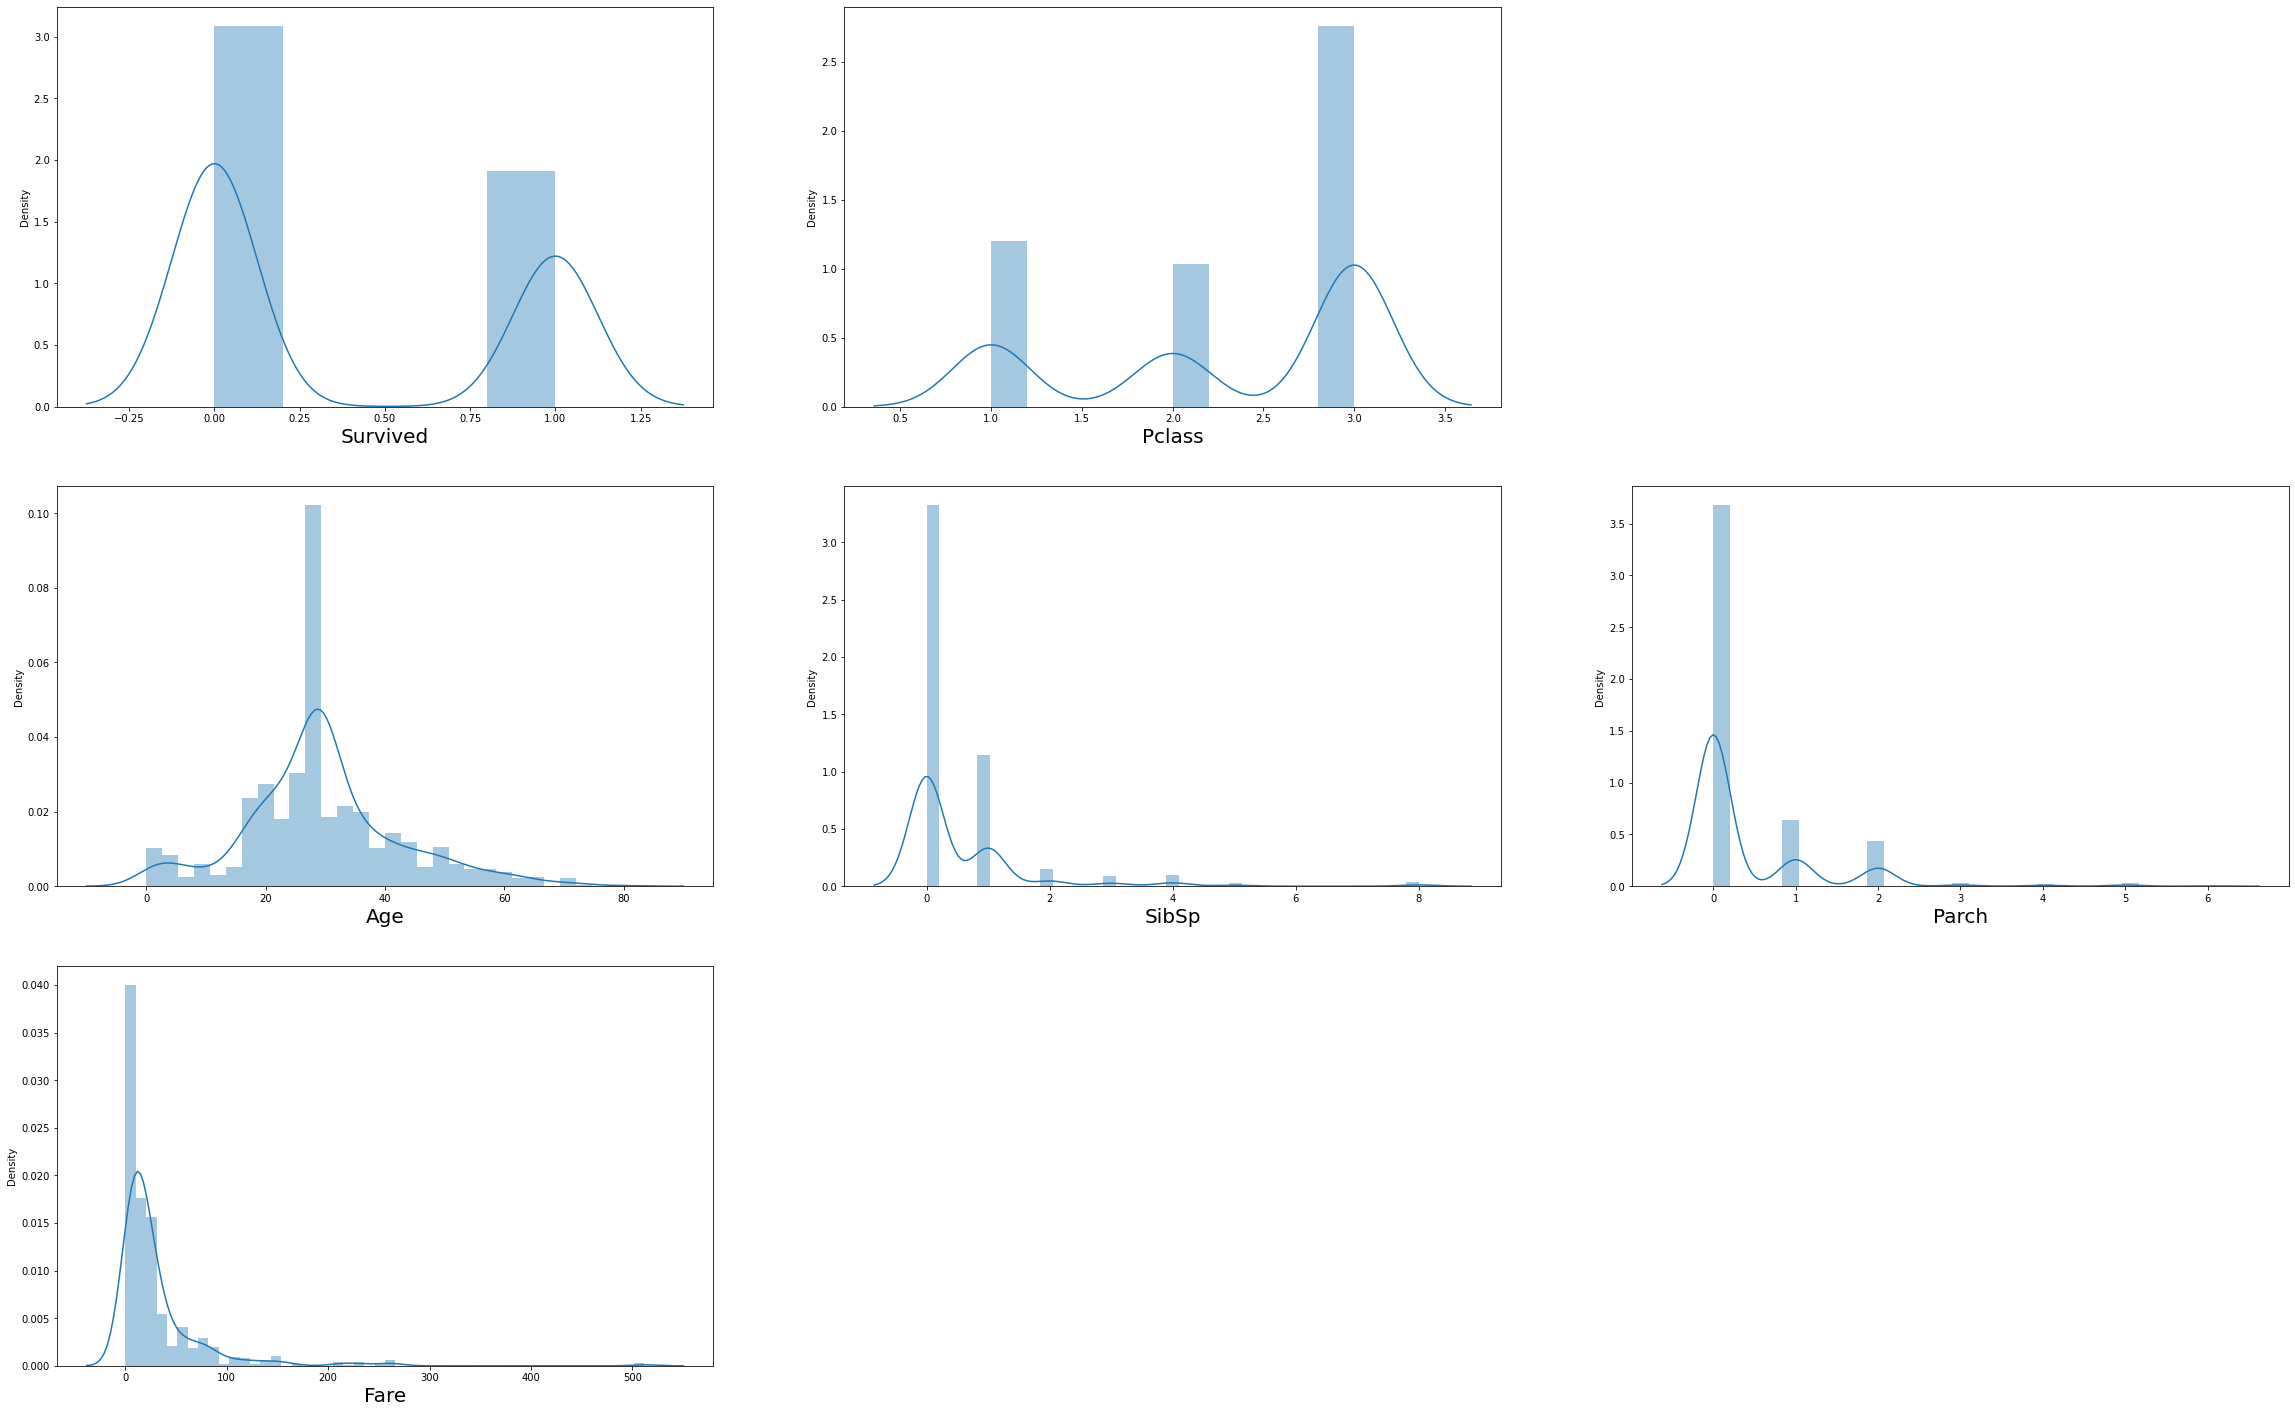

In [340]:
# Ploting Distribution curve

plt.figure(figsize=(40,25))
plotnumber = 1

for column in df:
    
    if(df[column].dtype == np.float64 or df[column].dtype == np.int64):
        if plotnumber<=9:
            ax = plt.subplot(3,3,plotnumber)
            sns.distplot(df[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber +=1
plt.show()

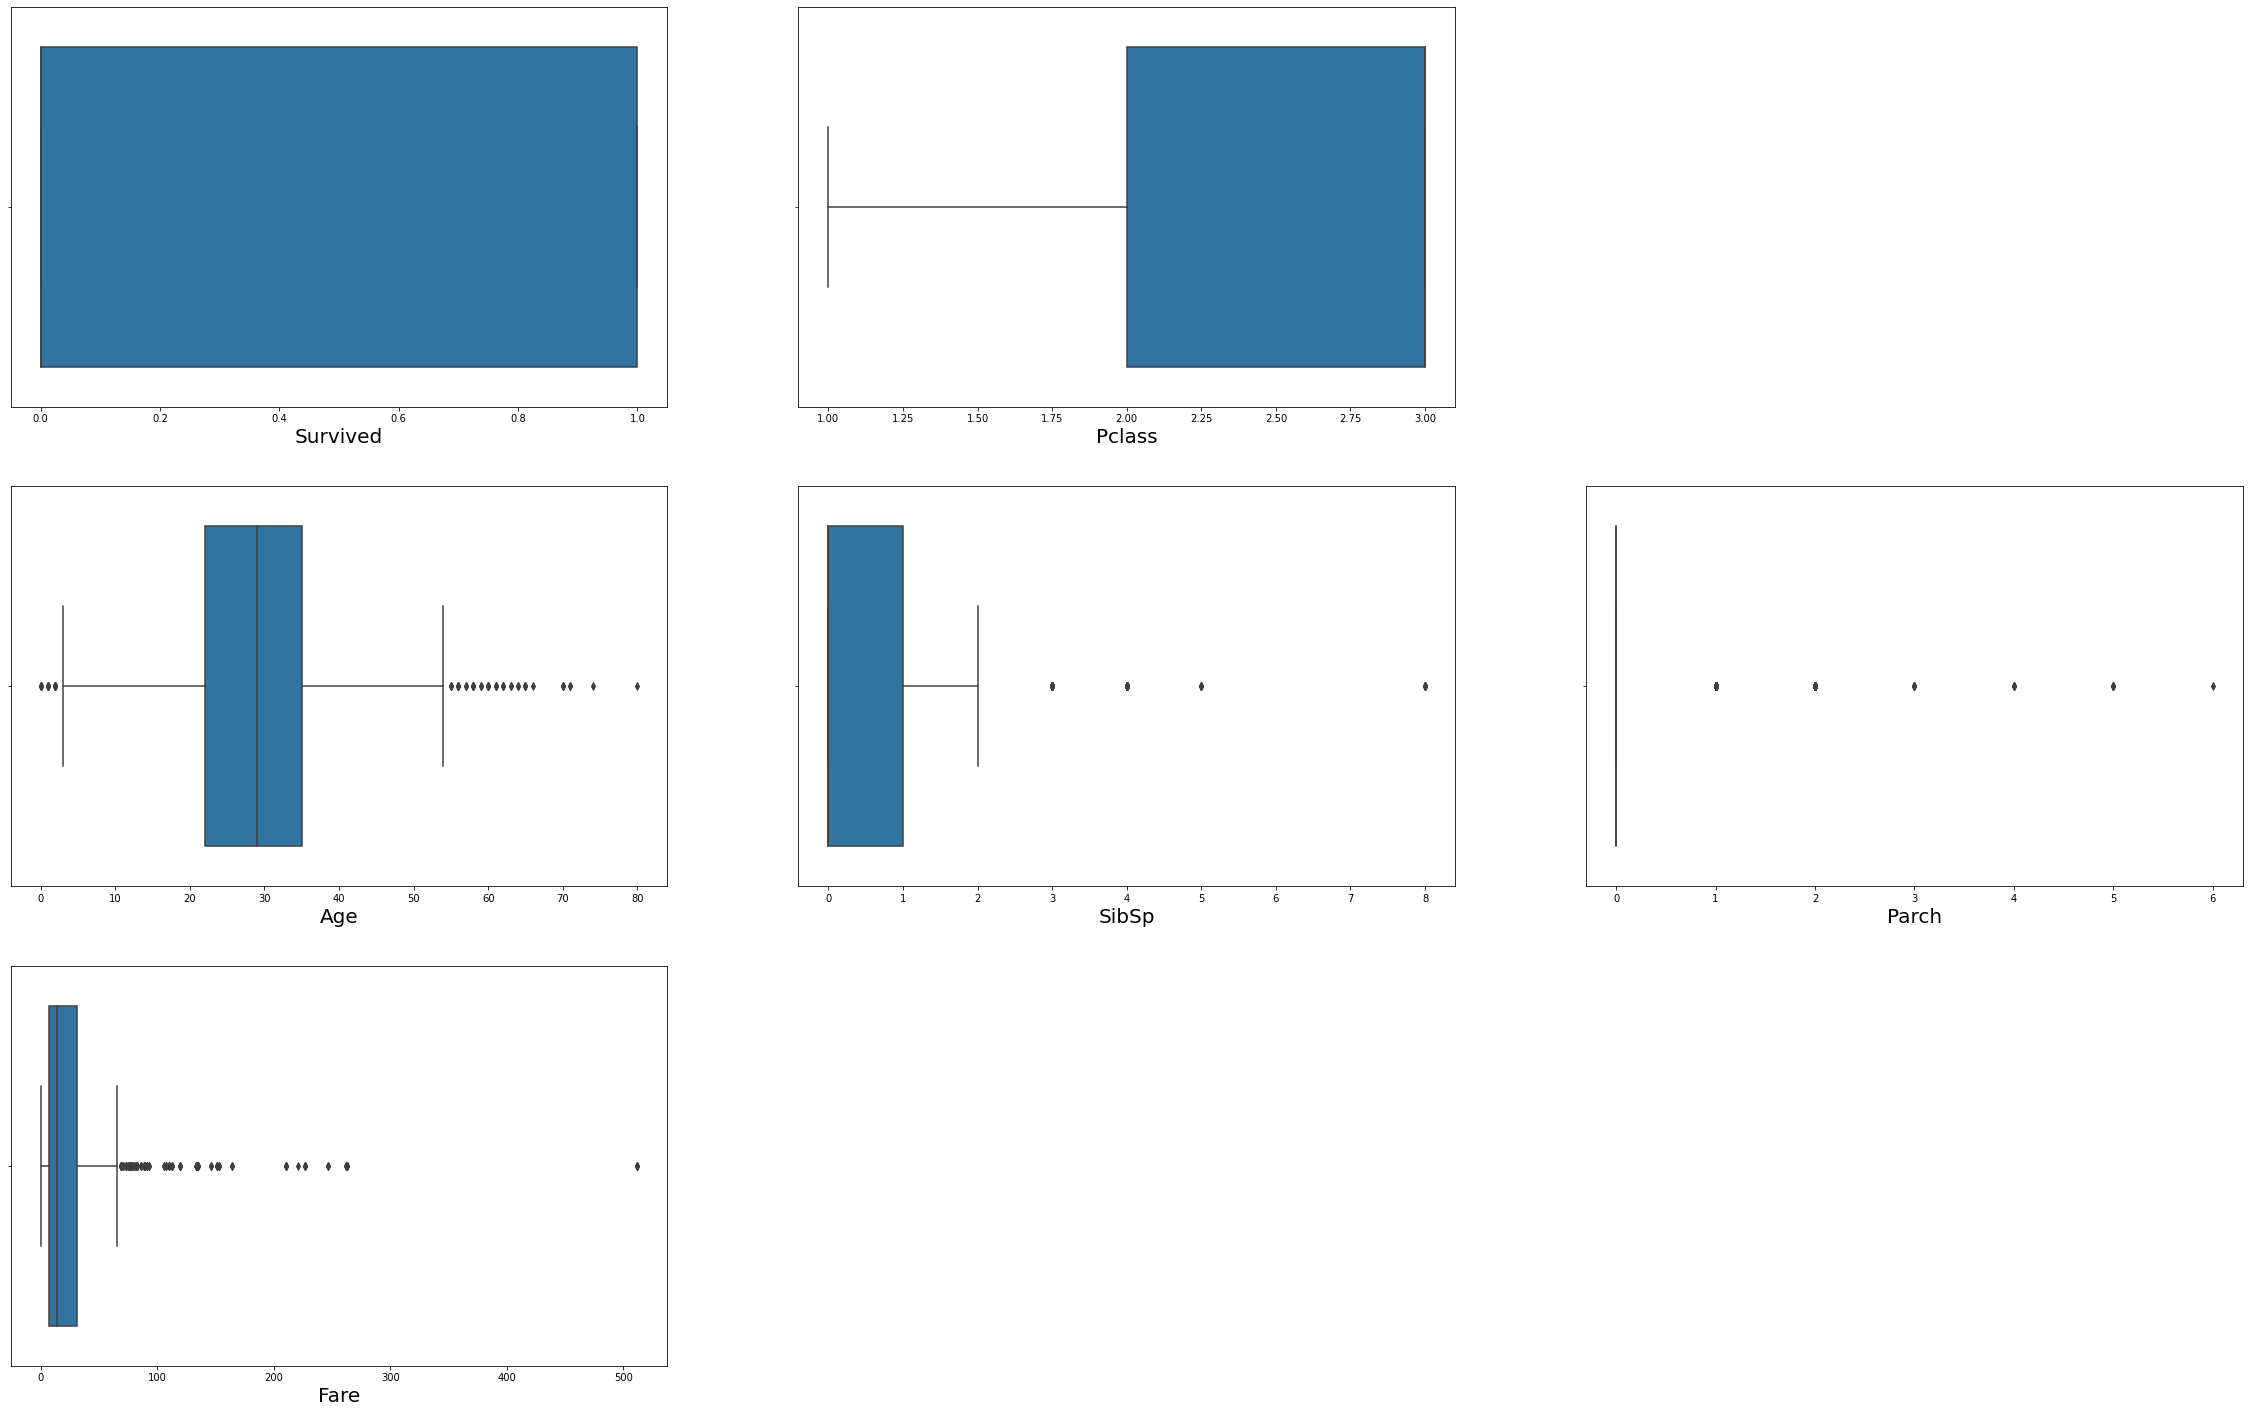

In [341]:
# Checking Outliers

plt.figure(figsize=(40,25))
plotnumber = 1

for column in df:
    
    if(df[column].dtype == np.float64 or df[column].dtype == np.int64):
        if plotnumber<=9:
            ax = plt.subplot(3,3,plotnumber)
            sns.boxplot(df[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber +=1
plt.show()

In [342]:
# Describing data

A = df.describe()
A

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.498313,0.524184,0.382452,31.677165
std,0.486260,0.834700,12.979638,1.103705,0.806761,49.706915
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.000000
50%,0.000000,3.000000,29.000000,0.000000,0.000000,14.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.000000


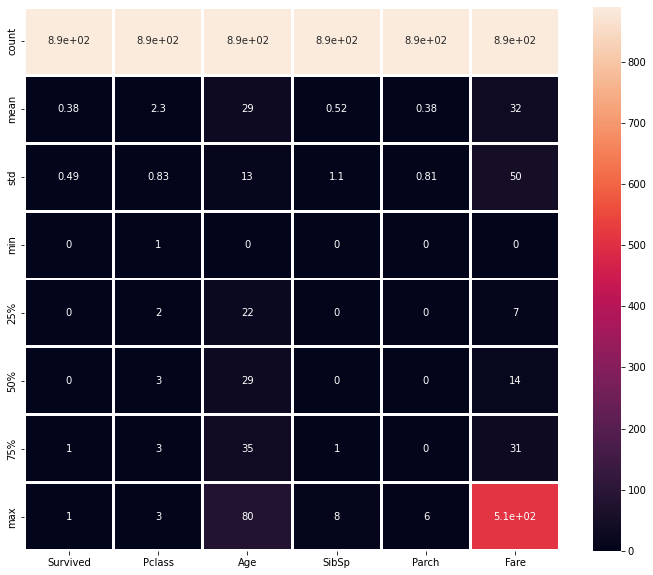

In [343]:
plt.figure(figsize=(12,10))
sns.heatmap(A,annot = True, linewidth=2)
plt.show()

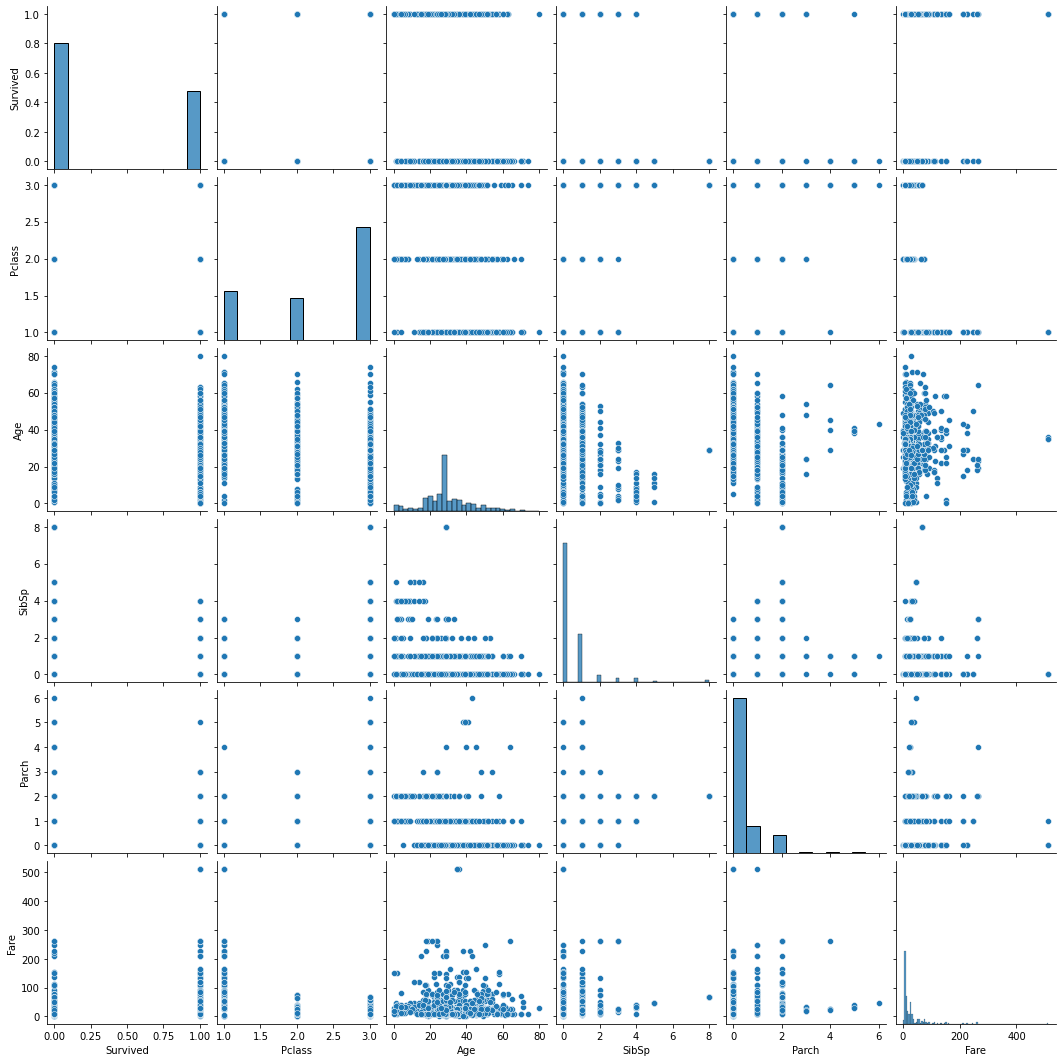

In [344]:
sns.pairplot(df)

In [345]:
# Columns : Sex, Cabin and Embarked has non numerical values 
# So converting to numerical values using LABEL ENCODER

In [346]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Cabin'] = le.fit_transform(df['Cabin'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [347]:
# Removing Outliers

from scipy import stats

z = np.abs(stats.zscore(df))
index = (np.where(z > 3)[0])

df_new = df.drop(df.index[index])

In [348]:
df.shape

(889, 9)

In [349]:
df_new.shape

(784, 9)

In [350]:
#importing packages to build my first algorithm
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [351]:
x = df.drop(['Survived'],axis=1)

In [352]:
y = df['Survived']

In [353]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score

In [354]:
for i in range(0,100):
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=i)
  dtc = DecisionTreeClassifier()
  dtc.fit(x_train,y_train)
  predict_test = dtc.predict(x_test)
  print(f"At random state {i}, the f1_score is: {f1_score(y_test,predict_test,average='weighted')}")
  print("\n")

At random state 0, the f1_score is: 0.7736615053204612


At random state 1, the f1_score is: 0.7850537617074782


At random state 2, the f1_score is: 0.8161848251483398


At random state 3, the f1_score is: 0.7449028816091744


At random state 4, the f1_score is: 0.8082056962843042


At random state 5, the f1_score is: 0.7823307149249278


At random state 6, the f1_score is: 0.7927561836957513


At random state 7, the f1_score is: 0.7755471186881872


At random state 8, the f1_score is: 0.7211533528295109


At random state 9, the f1_score is: 0.768718633754602


At random state 10, the f1_score is: 0.8175490292491991


At random state 11, the f1_score is: 0.7689478392634737


At random state 12, the f1_score is: 0.7774750883513373


At random state 13, the f1_score is: 0.7884888164603406


At random state 14, the f1_score is: 0.766679291335269


At random state 15, the f1_score is: 0.7572267339300913


At random state 16, the f1_score is: 0.7990028526019316


At random state 17, the f1

In [355]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score 
from sklearn.metrics import classification_report

In [356]:
# Random state 66 gives highest score 

**Logistic Rgression**

In [357]:
# Logistic Regression
Lr = LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=66,test_size=0.2)
Lr.fit(x_train,y_train)
predict_test = Lr.predict(x_test)
LR_accuracy = accuracy_score(y_test,predict_test)
print('Accuracy of Logistic Regression :{:.2f}'.format(LR_accuracy))
print('-'*60)
cm = confusion_matrix(y_test,predict_test)
print('\033[1m''Confusion Matrix\n',cm)



Accuracy of Logistic Regression :0.84
------------------------------------------------------------
Confusion Matrix
 [[93 11]
 [18 56]]


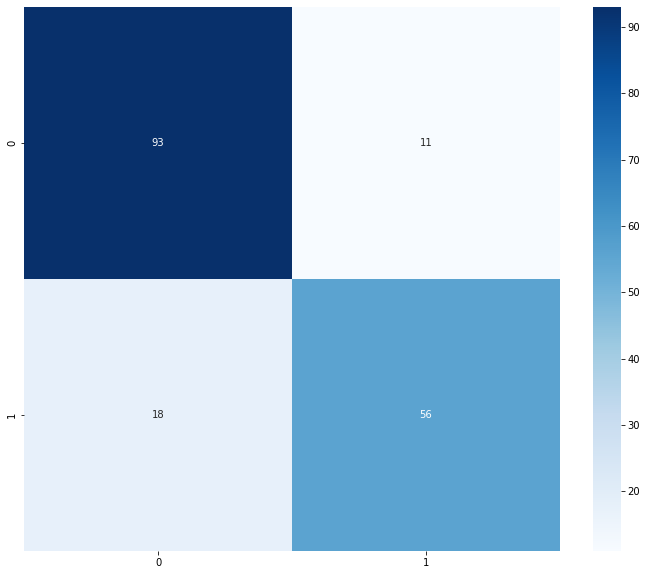

In [358]:
# Heatmap for Confusion Matrix

plt.figure(figsize=(12,10))

sns.heatmap(cm,annot=True,cmap='Blues')
plt.show()

In [359]:
print('\n Classification Report\n',classification_report(y_test,predict_test))


 Classification Report
               precision    recall  f1-score   support

           0       0.84      0.89      0.87       104
           1       0.84      0.76      0.79        74

    accuracy                           0.84       178
   macro avg       0.84      0.83      0.83       178
weighted avg       0.84      0.84      0.84       178



**Kneighbors Classifiers**

In [360]:
knn = KNeighborsClassifier(n_neighbors = 3)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=66,test_size=0.2)
knn.fit(x_train,y_train)
predict_test = knn.predict(x_test)
LR_accuracy = accuracy_score(y_test,predict_test)
print('Accuracy of Kneighbors Classifiers :{:.2f}'.format(LR_accuracy))
print('-'*60)
cm = confusion_matrix(y_test,predict_test)
print('\033[1m''Confusion Matrix\n',cm)

Accuracy of Kneighbors Classifiers :0.72
------------------------------------------------------------
Confusion Matrix
 [[84 20]
 [30 44]]


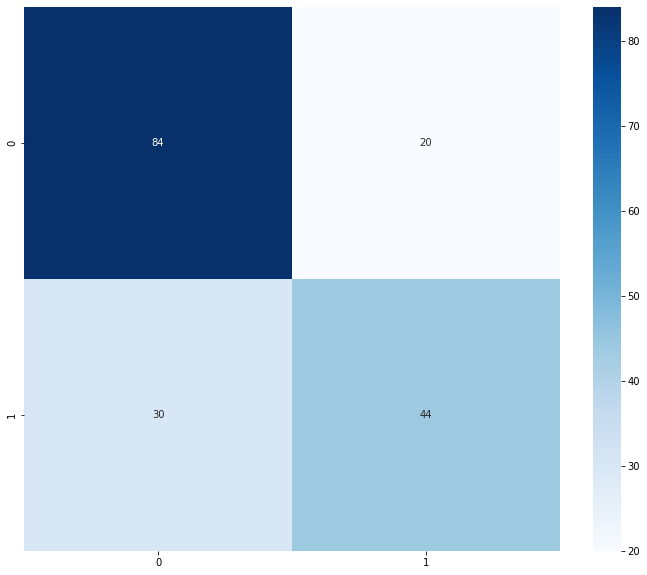

In [361]:
# Heatmap for Confusion Matrix

plt.figure(figsize=(12,10))

sns.heatmap(cm,annot=True,cmap='Blues')
plt.show()

In [362]:
print('\n Classification Report\n',classification_report(y_test,predict_test))


 Classification Report
               precision    recall  f1-score   support

           0       0.74      0.81      0.77       104
           1       0.69      0.59      0.64        74

    accuracy                           0.72       178
   macro avg       0.71      0.70      0.70       178
weighted avg       0.72      0.72      0.72       178



**Decision Tree Classifier**

In [363]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=66,test_size=0.2)
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
predict_test = dtc.predict(x_test)
LR_accuracy = accuracy_score(y_test,predict_test)
print('Accuracy of Decision Tree Classifiers :{:.2f}'.format(LR_accuracy))
print('-'*60)
cm = confusion_matrix(y_test,predict_test)
print('\033[1m''Confusion Matrix\n',cm)

Accuracy of Decision Tree Classifiers :0.87
------------------------------------------------------------
Confusion Matrix
 [[96  8]
 [15 59]]


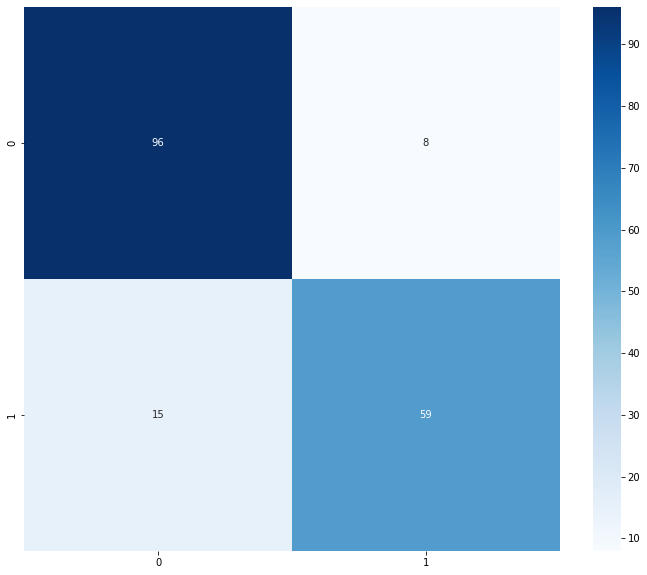

In [364]:
# Heatmap for Confusion Matrix

plt.figure(figsize=(12,10))

sns.heatmap(cm,annot=True,cmap='Blues')
plt.show()

In [365]:
print('\n Classification Report\n',classification_report(y_test,predict_test))


 Classification Report
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       104
           1       0.88      0.80      0.84        74

    accuracy                           0.87       178
   macro avg       0.87      0.86      0.86       178
weighted avg       0.87      0.87      0.87       178



**Support Vector Machine**

In [366]:
svc = SVC()
svc.fit(x_train,y_train)
predict_test = svc.predict(x_test)
LR_accuracy = accuracy_score(y_test,predict_test)
print('Accuracy of Support Vector Machine :{:.2f}'.format(LR_accuracy))
print('-'*60)
cm = confusion_matrix(y_test,predict_test)
print('\033[1m''Confusion Matrix\n',cm)

Accuracy of Support Vector Machine :0.67
------------------------------------------------------------
Confusion Matrix
 [[93 11]
 [47 27]]


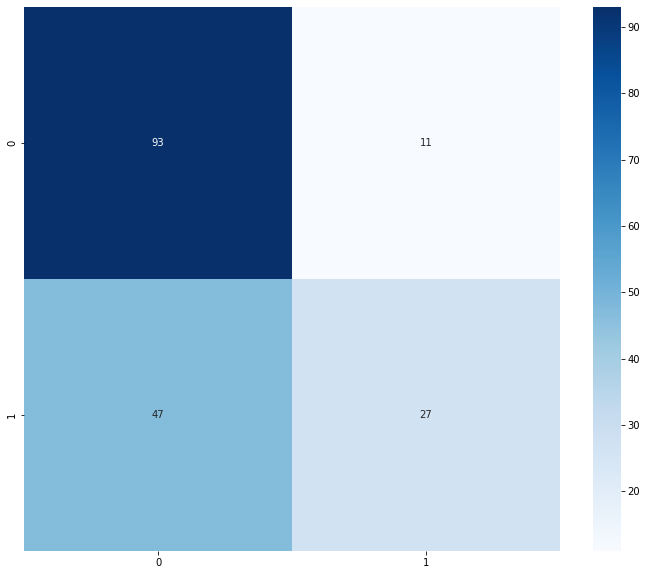

In [367]:
plt.figure(figsize=(12,10))

sns.heatmap(cm,annot=True,cmap='Blues')
plt.show()

In [368]:
print('\n Classification Report\n',classification_report(y_test,predict_test))


 Classification Report
               precision    recall  f1-score   support

           0       0.66      0.89      0.76       104
           1       0.71      0.36      0.48        74

    accuracy                           0.67       178
   macro avg       0.69      0.63      0.62       178
weighted avg       0.68      0.67      0.65       178



**Decision Tree Classifier Gives Better Result**

In [369]:
# Saving model

import joblib as jb

filename = "Completed_model.jb"
jb.dump(dtc, filename)

['Completed_model.jb']

In [370]:
# Loading Model

loaded_model = jb.load(filename)
result = loaded_model.score(x_test, y_test)
print(result)

0.8707865168539326
